#   Fake News Detection

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("FA-KES-Dataset.csv",encoding='latin1')

In [3]:
data.shape

(804, 7)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   unit_id          804 non-null    int64 
 1   article_title    804 non-null    object
 2   article_content  804 non-null    object
 3   source           804 non-null    object
 4   date             804 non-null    object
 5   location         804 non-null    object
 6   labels           804 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 44.1+ KB


In [5]:
data.head()

,unit_id,article_title,article_content,source,date,location,labels
0,1914947530,Syria attack symptoms consistent with nerve ag...,Wed 05 Apr 2017 Syria attack symptoms consiste...,nna,4/5/2017,idlib,0
1,1914947532,Homs governor says U.S. attack caused deaths b...,Fri 07 Apr 2017 at 0914 Homs governor says U.S...,nna,4/7/2017,homs,0
2,1914947533,Death toll from Aleppo bomb attack at least 112,Sun 16 Apr 2017 Death toll from Aleppo bomb at...,nna,4/16/2017,aleppo,0
3,1914947534,Aleppo bomb blast kills six Syrian state TV,Wed 19 Apr 2017 Aleppo bomb blast kills six Sy...,nna,4/19/2017,aleppo,0
4,1914947535,29 Syria Rebels Dead in Fighting for Key Alepp...,Sun 10 Jul 2016 29 Syria Rebels Dead in Fighti...,nna,7/10/2016,aleppo,0


In [6]:
data.describe()

,unit_id,labels
count,8.040000e+02,804.000000
mean,1.936024e+09,0.529851
std,1.876968e+07,0.499419
min,1.914948e+09,0.000000
25%,1.923848e+09,0.000000
50%,1.924058e+09,1.000000
75%,1.962496e+09,1.000000
max,1.965511e+09,1.000000


# Data Preprocessing

# Find the Null value

In [7]:
data.isnull().sum()

unit_id            0
article_title      0
article_content    0
source             0
date               0
location           0
labels             0
dtype: int64

# Convert Object into int type using LabelEncoder

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le = LabelEncoder()

In [10]:
data['article_title'] = le.fit_transform(data['article_title'])
data['article_content'] = le.fit_transform(data['article_content'])
data['source'] = le.fit_transform(data['source'])
data['location'] = le.fit_transform(data['location'])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   unit_id          804 non-null    int64 
 1   article_title    804 non-null    int32 
 2   article_content  804 non-null    int32 
 3   source           804 non-null    int32 
 4   date             804 non-null    object
 5   location         804 non-null    int32 
 6   labels           804 non-null    int64 
dtypes: int32(4), int64(2), object(1)
memory usage: 31.5+ KB


In [12]:
data.head()

,unit_id,article_title,article_content,source,date,location,labels
0,1914947530,553,750,9,4/5/2017,7,0
1,1914947532,338,408,9,4/7/2017,6,0
2,1914947533,273,647,9,4/16/2017,0,0
3,1914947534,154,751,9,4/19/2017,0,0
4,1914947535,62,646,9,7/10/2016,0,0


In [13]:
Y = data['labels']
X = data.drop(columns=['labels','date'])

#  Create 1 model

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
model1 = LogisticRegression()

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3)

In [18]:
x_train.shape

(562, 5)

In [19]:
x_test.shape

(242, 5)

In [20]:
model1.fit(x_train,y_train)

LogisticRegression()

In [21]:
pred = model1.predict(x_test)

In [22]:
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

#  Accuracy of first model

In [23]:
accuracy_score(pred,y_test)

0.5330578512396694

In [24]:
confusion_matrix(pred,y_test)

array([[  0,   0],
       [113, 129]], dtype=int64)

In [25]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.53      0.70       242

    accuracy                           0.53       242
   macro avg       0.50      0.27      0.35       242
weighted avg       1.00      0.53      0.70       242



C:\Users\Gupta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#  Roc Curve

In [26]:
from sklearn.metrics import roc_auc_score, roc_curve

In [27]:
predict_prob = model1.predict_proba(x_test)

In [28]:
positive_prob = predict_prob[:,1]

In [29]:
score = roc_auc_score(y_test,positive_prob)
score

0.47489195307676474

In [30]:
fpr,tpr,x = roc_curve(y_test,positive_prob)

In [31]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'True positive Rate')

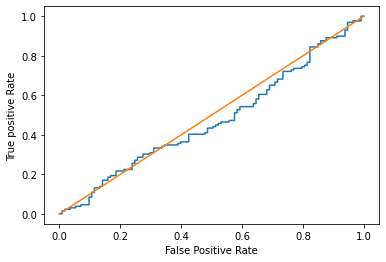

In [32]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])
plt.xlabel("False Positive Rate")
plt.ylabel("True positive Rate")

#  Process for 2 model

In [33]:
data.head()

,unit_id,article_title,article_content,source,date,location,labels
0,1914947530,553,750,9,4/5/2017,7,0
1,1914947532,338,408,9,4/7/2017,6,0
2,1914947533,273,647,9,4/16/2017,0,0
3,1914947534,154,751,9,4/19/2017,0,0
4,1914947535,62,646,9,7/10/2016,0,0


# Split Date into Month,Date and year

In [34]:
data['Month']= data['date'].apply(lambda x: x.split("/")[0])
data['Date']= data['date'].apply(lambda x: x.split("/")[1])
data['Year']= data['date'].apply(lambda x: x.split("/")[2])

In [35]:
data = data.drop(columns=['date'])

In [36]:
data.head()

,unit_id,article_title,article_content,source,location,labels,Month,Date,Year
0,1914947530,553,750,9,7,0,4,5,2017
1,1914947532,338,408,9,6,0,4,7,2017
2,1914947533,273,647,9,0,0,4,16,2017
3,1914947534,154,751,9,0,0,4,19,2017
4,1914947535,62,646,9,0,0,7,10,2016


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   unit_id          804 non-null    int64 
 1   article_title    804 non-null    int32 
 2   article_content  804 non-null    int32 
 3   source           804 non-null    int32 
 4   location         804 non-null    int32 
 5   labels           804 non-null    int64 
 6   Month            804 non-null    object
 7   Date             804 non-null    object
 8   Year             804 non-null    object
dtypes: int32(4), int64(2), object(3)
memory usage: 44.1+ KB


In [38]:
Y1 = data['labels'] 
X1 = data.drop(columns=['labels'])

In [39]:
model2 = LogisticRegression()

In [40]:
x_train_new , x_test_new, y_train_new,y_test_new = train_test_split(X1,Y1,test_size=0.3, random_state=843)
                                                                

In [41]:
model2.fit(x_train_new, y_train_new)

LogisticRegression()

In [42]:
predi = model2.predict(x_test_new)

# Accuracy of  2 Model

In [43]:
accuracy_score(predi,y_test_new)

0.5082644628099173

In [44]:
confusion_matrix(predi,y_test_new)

array([[  0,   0],
       [119, 123]], dtype=int64)

In [45]:
print(classification_report(predi,y_test_new))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.51      0.67       242

    accuracy                           0.51       242
   macro avg       0.50      0.25      0.34       242
weighted avg       1.00      0.51      0.67       242



C:\Users\Gupta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#  3 model
# Remove Outlier's

In [46]:
X.head()

,unit_id,article_title,article_content,source,location
0,1914947530,553,750,9,7
1,1914947532,338,408,9,6
2,1914947533,273,647,9,0
3,1914947534,154,751,9,0
4,1914947535,62,646,9,0


In [47]:
from scipy import stats

In [48]:
print("skewnees of data",stats.skew(X))

skewnees of data [0.82568046 0.01314481 0.00547256 0.34256688 0.74559323]


In [49]:
print("kurtosis of data ", stats.kurtosis(X))

kurtosis of data  [-1.23194799 -1.20636734 -1.20101106 -1.17763662 -0.81221509]


In [50]:
import numpy as np
zscore = np.abs(stats.zscore(X))
zscore

array([[1.12358429e+00, 7.55409832e-01, 1.57108337e+00, 8.04783590e-01,
        1.20441860e+00],
       [1.12358418e+00, 2.01754183e-01, 6.64417618e-02, 8.04783590e-01,
        9.03687991e-01],
       [1.12358413e+00, 4.91129350e-01, 1.11793107e+00, 8.04783590e-01,
        9.00695647e-01],
       ...,
       [1.57199484e+00, 6.46946748e-01, 1.65377715e+00, 5.81971604e-01,
        9.00695647e-01],
       [1.57199494e+00, 1.33254330e+00, 1.71537067e+00, 5.81971604e-01,
        1.20441860e+00],
       [1.57199521e+00, 9.60198412e-01, 4.35105440e-01, 5.81971604e-01,
        1.49617217e-03]])

In [51]:
outlierlist = np.where(zscore>3)

In [52]:
outlierlist

(array([], dtype=int64), array([], dtype=int64))

In [53]:
final = outlierlist[0]

In [54]:
X2= X.drop(index=final)
Y2 =Y.drop(index=final)

In [55]:
x_train_new1,x_test_new1,y_train_new1,y_test_new1 = train_test_split(X2,Y2,test_size=0.1, random_state=843)

In [56]:
model3 =  LogisticRegression()

In [57]:
model3.fit(x_train_new1, y_train_new1)

LogisticRegression()

In [58]:
predi1 = model3.predict(x_test_new1)

# Accuracy of 3 model

In [59]:
accuracy_score(predi1,y_test_new1)

0.5432098765432098

In [60]:
confusion_matrix(predi1,y_test_new1)

array([[ 0,  0],
       [37, 44]], dtype=int64)

In [61]:
print(classification_report(predi1,y_test_new1))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.54      0.70        81

    accuracy                           0.54        81
   macro avg       0.50      0.27      0.35        81
weighted avg       1.00      0.54      0.70        81



C:\Users\Gupta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#  4 model
# Find the correlation between the columns 

In [62]:
X2.head()

,unit_id,article_title,article_content,source,location
0,1914947530,553,750,9,7
1,1914947532,338,408,9,6
2,1914947533,273,647,9,0
3,1914947534,154,751,9,0
4,1914947535,62,646,9,0


In [63]:
print("correlation of first variable:",stats.stats.spearmanr(X2['unit_id'],Y2))
print("correlation of second variable:",stats.stats.spearmanr(X2['article_title'],Y2))
print("correlation of third variable:",stats.stats.spearmanr(X2['article_content'],Y2))
print("correlation of fourth variable:",stats.stats.spearmanr(X2['source'],Y2))
print("correlation of fifth variable:",stats.stats.spearmanr(X2['location'],Y2))


correlation of first variable: SpearmanrResult(correlation=0.0011381254337179023, pvalue=0.9742956282480212)
correlation of second variable: SpearmanrResult(correlation=-0.026697634128770336, pvalue=0.44966985470156484)
correlation of third variable: SpearmanrResult(correlation=-0.029032936094966308, pvalue=0.4110095627534128)
correlation of fourth variable: SpearmanrResult(correlation=0.02112297124750733, pvalue=0.5497902379662917)
correlation of fifth variable: SpearmanrResult(correlation=0.009141771896521579, pvalue=0.7957771476589552)


In [64]:
X3 = X2.drop(columns=['unit_id','location'])

In [65]:
X3.head()

,article_title,article_content,source
0,553,750,9
1,338,408,9
2,273,647,9
3,154,751,9
4,62,646,9


In [66]:
model4 = LogisticRegression()

In [67]:
x_train_new2,x_test_new2,y_train_new2,y_test_new2 = train_test_split(X3,Y2,test_size=0.1,random_state=843)

In [68]:
model4.fit(x_train_new2 , y_train_new2 )

LogisticRegression()

In [69]:
predi2 = model4.predict(x_test_new2)

# Accuracy of 4 Model

In [70]:
accuracy_score(predi2,y_test_new2)

0.5432098765432098

In [71]:
confusion_matrix(predi2,y_test_new2)

array([[ 7,  7],
       [30, 37]], dtype=int64)

In [72]:
print(classification_report(predi2,y_test_new2))

              precision    recall  f1-score   support

           0       0.19      0.50      0.27        14
           1       0.84      0.55      0.67        67

    accuracy                           0.54        81
   macro avg       0.52      0.53      0.47        81
weighted avg       0.73      0.54      0.60        81



<AxesSubplot:>

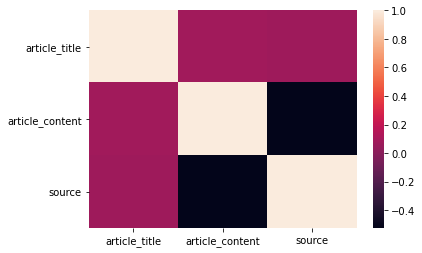

In [73]:
import seaborn
seaborn.heatmap(data=X3.corr())